In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [298]:
plt.rcParams['axes.labelsize'] = 8    
plt.rcParams['axes.titlesize'] = 9    
plt.rcParams['xtick.labelsize'] = 8   
plt.rcParams['ytick.labelsize'] = 8 
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['font.family']='Arial'

In [44]:
df_freq_all = pd.read_csv('../empirical/subsampling_SIR_v20250127/notebooks/bias_corrected_freqs_ALL.csv')
df_freq_all

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous
0,centerE16N4geo50000,0.000378,3.602009e-07,0.003046,1.102744e-06,0.007364,1.101622e-06
1,centerE16N4geo100000,0.000378,3.023802e-07,0.003046,7.926844e-07,0.007363,8.883405e-07
2,centerE16N4geo150000,0.000377,3.267463e-07,0.003047,1.013634e-06,0.007363,9.145919e-07
3,centerE9N9geo50000,0.000377,4.392370e-07,0.003046,9.302143e-07,0.007362,8.108512e-07
4,centerE9N9geo100000,0.000376,1.562738e-07,0.003046,7.865813e-07,0.007364,9.628871e-07
5,centerE9N9geo150000,0.000376,4.565446e-07,0.003046,8.638920e-07,0.007363,1.099183e-06
6,centerE6N4geo50000,0.000376,3.600194e-07,0.003050,6.548747e-07,0.007358,6.336618e-07
7,centerE6N4geo100000,0.000377,3.231019e-07,0.003049,7.708709e-07,0.007360,7.992652e-07
8,centerE6N4geo150000,0.000377,3.808563e-07,0.003048,7.571562e-07,0.007362,7.645959e-07
9,uniformgeo,0.000376,3.890058e-07,0.003047,4.956468e-07,0.007364,7.888202e-07


In [45]:
df_freq_seg = pd.read_csv('../empirical/subsampling_SIR_v20250127/notebooks/bias_corrected_freqs_SEGONLY.csv')
df_freq_seg

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous
0,centerE16N4geo50000,0.005707,0.000077,0.035637,0.000468,0.076098,0.000971
1,centerE16N4geo100000,0.004472,0.000052,0.028104,0.000254,0.061144,0.000537
2,centerE16N4geo150000,0.004225,0.000046,0.026764,0.000324,0.058205,0.000521
3,centerE9N9geo50000,0.007834,0.000111,0.046817,0.000410,0.100291,0.000795
4,centerE9N9geo100000,0.005615,0.000064,0.034280,0.000255,0.074969,0.000534
5,centerE9N9geo150000,0.005082,0.000069,0.031238,0.000264,0.068500,0.000846
6,centerE6N4geo50000,0.008298,0.000140,0.050900,0.000649,0.106703,0.001281
7,centerE6N4geo100000,0.005161,0.000085,0.032408,0.000391,0.070628,0.000691
8,centerE6N4geo150000,0.004542,0.000036,0.028689,0.000213,0.062913,0.000745
9,uniformgeo,0.004451,0.000042,0.027791,0.000271,0.061298,0.000867


In [46]:
geo_rows = df_freq_all[df_freq_all['Scenario'].str.contains(r'geo\d+$', regex=True)].copy()
geo_rows['geo_group'] = df_freq_all['Scenario'].str.extract(r'(geo\d+)$')
geo_aggregated = geo_rows.groupby('geo_group', as_index=False).agg({
    'Mean_LOF': 'mean', 'Std_LOF': 'mean',
    'Mean_Missense': 'mean', 'Std_Missense': 'mean',
    'Mean_Synonymous': 'mean', 'Std_Synonymous': 'mean'
}).rename(columns={'geo_group': 'Scenario'})  # Rename to match original structure

df_freq_all_avg = df_freq_all[~df_freq_all['Scenario'].str.contains(r'geo\d+$', regex=True)]
df_freq_all_avg = pd.concat([df_freq_all_avg, geo_aggregated], ignore_index=True)
df_freq_all_avg = df_freq_all_avg.reindex([7,5,6,0,1,2,3,4]).reset_index(drop=True)
df_freq_all_avg

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous
0,geo50000,0.000377,3.864858e-07,0.003047,8.959444e-07,0.007361,8.487118e-07
1,geo100000,0.000377,2.605853e-07,0.003047,7.833789e-07,0.007362,8.834976e-07
2,geo150000,0.000377,3.880491e-07,0.003047,8.782274e-07,0.007363,9.261236e-07
3,uniformgeo,0.000376,3.890058e-07,0.003047,4.956468e-07,0.007364,7.888202e-07
4,centerX19Y4pca0.0015,0.000390,4.037725e-07,0.003048,8.750140e-07,0.007385,1.435010e-06
5,centerX19Y4pca0.0025,0.000392,4.351247e-07,0.003047,9.681572e-07,0.007398,1.079894e-06
6,centerX19Y4pca0.005,0.000395,5.280000e-07,0.003047,9.345730e-07,0.007420,1.231219e-06
7,uniformpca,0.000399,4.011700e-07,0.003049,7.301793e-07,0.007452,1.281464e-06


In [47]:
geo_rows = df_freq_seg[df_freq_seg['Scenario'].str.contains(r'geo\d+$', regex=True)].copy()
geo_rows['geo_group'] = df_freq_seg['Scenario'].str.extract(r'(geo\d+)$')
geo_aggregated = geo_rows.groupby('geo_group', as_index=False).agg({
    'Mean_LOF': 'mean', 'Std_LOF': 'mean',
    'Mean_Missense': 'mean', 'Std_Missense': 'mean',
    'Mean_Synonymous': 'mean', 'Std_Synonymous': 'mean'
}).rename(columns={'geo_group': 'Scenario'})  # Rename to match original structure

df_freq_seg_avg = df_freq_seg[~df_freq_seg['Scenario'].str.contains(r'geo\d+$', regex=True)]
df_freq_seg_avg = pd.concat([df_freq_seg_avg, geo_aggregated], ignore_index=True)
df_freq_seg_avg = df_freq_seg_avg.reindex([7,5,6,0,1,2,3,4]).reset_index(drop=True)
df_freq_seg_avg

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous
0,geo50000,0.007280,0.000110,0.044451,0.000509,0.094364,0.001016
1,geo100000,0.005083,0.000067,0.031597,0.000300,0.068914,0.000587
2,geo150000,0.004616,0.000051,0.028897,0.000267,0.063206,0.000704
3,uniformgeo,0.004451,0.000042,0.027791,0.000271,0.061298,0.000867
4,centerX19Y4pca0.0015,0.004725,0.000035,0.024953,0.000279,0.049942,0.000289
5,centerX19Y4pca0.0025,0.004829,0.000065,0.024494,0.000228,0.048160,0.000333
6,centerX19Y4pca0.005,0.004531,0.000042,0.022622,0.000219,0.043933,0.000399
7,uniformpca,0.004206,0.000049,0.020909,0.000282,0.040298,0.000201


In [48]:
custom_order = [
        'centerE16N4geo50000', 'centerE16N4geo100000', 'centerE16N4geo150000',
        'centerE9N9geo50000', 'centerE9N9geo100000', 'centerE9N9geo150000',
        'centerE6N4geo50000', 'centerE6N4geo100000', 'centerE6N4geo150000',
        'uniformgeo',
        'centerX19Y4pca0.0015', 'centerX19Y4pca0.0025', 'centerX19Y4pca0.005',
        'uniformpca'
    ]

In [49]:
mean_segsites_lof = []
std_segsites_lof = []
mean_segsites_missense = []
std_segsites_missense = []
mean_segsites_synonymous = []
std_segsites_synonymous = []

mean_singletons_lof = []
std_singletons_lof = []
mean_singletons_missense = []
std_singletons_missense = []
mean_singletons_synonymous = []
std_singletons_synonymous = []

for vt in ['lof','missense','synonymous']:
    for scenario in custom_order:
        sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_{scenario}_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
        grouped=sfs[sfs['OBS_N']>0].groupby('SIR_REP')['COUNT_SITES'].sum()
        grouped_sing = sfs[sfs['OBS_N']==1].groupby('SIR_REP')['COUNT_SITES'].sum()
        if vt is 'lof':
            mean_segsites_lof.append(grouped.mean())
            std_segsites_lof.append(grouped.std())
            mean_singletons_lof.append(grouped_sing.mean())
            std_singletons_lof.append(grouped_sing.std())
        elif vt is 'missense':
            mean_segsites_missense.append(grouped.mean())
            std_segsites_missense.append(grouped.std())
            mean_singletons_missense.append(grouped_sing.mean())
            std_singletons_missense.append(grouped_sing.std())
        elif vt is 'synonymous':
            mean_segsites_synonymous.append(grouped.mean())
            std_segsites_synonymous.append(grouped.std())    
            mean_singletons_synonymous.append(grouped_sing.mean())
            std_singletons_synonymous.append(grouped_sing.std())
            

In [106]:
df_het = pd.read_csv('../empirical/subsampling_SIR_v20250127/notebooks/bias_corrected_hets_ALL.csv')
df_het

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous
0,centerE16N4geo50000,0.000601,5.895584e-07,0.004330,1.249178e-06,0.005083,1.222314e-06
1,centerE16N4geo100000,0.000601,4.357951e-07,0.004329,9.040169e-07,0.005084,9.170916e-07
2,centerE16N4geo150000,0.000600,4.492644e-07,0.004330,1.023714e-06,0.005082,1.465560e-06
3,centerE9N9geo50000,0.000598,4.050165e-07,0.004328,1.070452e-06,0.005077,1.247332e-06
4,centerE9N9geo100000,0.000598,3.620723e-07,0.004328,7.636642e-07,0.005078,1.496384e-06
5,centerE9N9geo150000,0.000598,6.200186e-07,0.004328,7.334828e-07,0.005079,1.458091e-06
6,centerE6N4geo50000,0.000598,5.048815e-07,0.004332,7.043896e-07,0.005075,1.710876e-06
7,centerE6N4geo100000,0.000599,4.911056e-07,0.004332,9.638331e-07,0.005079,1.428808e-06
8,centerE6N4geo150000,0.000599,4.587042e-07,0.004331,1.038094e-06,0.005080,9.377853e-07
9,uniformgeo,0.000598,5.788364e-07,0.004329,8.864698e-07,0.005081,1.021499e-06


In [108]:
geo_rows = df_het[df_het['Scenario'].str.contains(r'geo\d+$', regex=True)].copy()
df_het['geo_group'] = df_het['Scenario'].str.extract(r'(geo\d+)$')
# df_het
geo_aggregated = geo_rows.groupby('geo_group', as_index=False).agg({
    'Mean_LOF': 'mean', 'Std_LOF': 'mean',
    'Mean_Missense': 'mean', 'Std_Missense': 'mean',
    'Mean_Synonymous': 'mean', 'Std_Synonymous': 'mean'
}).rename(columns={'geo_group': 'Scenario'})  # Rename to match original structure

df_het_avg = df_het[~df_het['Scenario'].str.contains(r'geo\d+$', regex=True)]
df_het_avg = pd.concat([df_het_avg, geo_aggregated], ignore_index=True)
df_het_avg = df_het_avg.reindex([7,5,6,0,1,2,3,4]).reset_index(drop=True)
df_het_avg

,Scenario,Mean_LOF,Std_LOF,Mean_Missense,Std_Missense,Mean_Synonymous,Std_Synonymous,geo_group
0,geo50000,0.000599,4.998188e-07,0.004330,1.008007e-06,0.005078,0.000001,NaN
1,geo100000,0.000599,4.296577e-07,0.004330,8.771714e-07,0.005080,0.000001,NaN
2,geo150000,0.000599,5.093291e-07,0.004330,9.317635e-07,0.005080,0.000001,NaN
3,uniformgeo,0.000598,5.788364e-07,0.004329,8.864698e-07,0.005081,0.000001,NaN
4,centerX19Y4pca0.0015,0.000623,5.456655e-07,0.004373,1.330947e-06,0.005217,0.000002,NaN
5,centerX19Y4pca0.0025,0.000628,6.320296e-07,0.004393,1.066476e-06,0.005299,0.000003,NaN
6,centerX19Y4pca0.005,0.000639,9.757154e-07,0.004431,1.789580e-06,0.005433,0.000003,NaN
7,uniformpca,0.000647,4.500642e-07,0.004459,1.712052e-06,0.005560,0.000002,NaN


In [51]:
bed_file = "../empirical/subsampling_SIR_v20250127/metadata/xgen_plus_spikein.GRCh38.bed"
df_bed = pd.read_csv(bed_file, sep='\t', header=None, names=["chr", "start", "end"])
df_chr1_bed = df_bed[df_bed["chr"] == "chr1"]
df_chr1_bed["length"] = df_chr1_bed["end"] - df_chr1_bed["start"]
total_chr1_length_kb = df_chr1_bed["length"].sum() / 1000
total_chr1_length_kb

3924.065

In [52]:
scale_factor = total_chr1_length_kb

In [53]:
mean_segsites_lof = [x / scale_factor for x in [(mean_segsites_lof[i] + mean_segsites_lof[i+3] + mean_segsites_lof[i+6]) / 3 for i in range(3)] + mean_segsites_lof[9:]]
mean_segsites_missense = [x / scale_factor for x in [(mean_segsites_missense[i] + mean_segsites_missense[i+3] + mean_segsites_missense[i+6]) / 3 for i in range(3)] + mean_segsites_missense[9:]]
mean_segsites_synonymous = [x / scale_factor for x in [(mean_segsites_synonymous[i] + mean_segsites_synonymous[i+3] + mean_segsites_synonymous[i+6]) / 3 for i in range(3)] + mean_segsites_synonymous[9:]]
mean_singletons_lof = [x / scale_factor for x in [(mean_singletons_lof[i] + mean_singletons_lof[i+3] + mean_singletons_lof[i+6]) / 3 for i in range(3)] + mean_singletons_lof[9:]]
mean_singletons_missense = [x / scale_factor for x in [(mean_singletons_missense[i] + mean_singletons_missense[i+3] + mean_singletons_missense[i+6]) / 3 for i in range(3)] + mean_singletons_missense[9:]]
mean_singletons_synonymous = [x / scale_factor for x in [(mean_singletons_synonymous[i] + mean_singletons_synonymous[i+3] + mean_singletons_synonymous[i+6]) / 3 for i in range(3)] + mean_singletons_synonymous[9:]]

std_segsites_lof = [x / scale_factor for x in [(std_segsites_lof[i] + std_segsites_lof[i+3] + std_segsites_lof[i+6]) / 3 for i in range(3)] + std_segsites_lof[9:]]
std_segsites_missense = [x / scale_factor for x in [(std_segsites_missense[i] + std_segsites_missense[i+3] + std_segsites_missense[i+6]) / 3 for i in range(3)] + std_segsites_missense[9:]]
std_segsites_synonymous = [x / scale_factor for x in [(std_segsites_synonymous[i] + std_segsites_synonymous[i+3] + std_segsites_synonymous[i+6]) / 3 for i in range(3)] + std_segsites_synonymous[9:]]
std_singletons_lof = [x / scale_factor for x in [(std_singletons_lof[i] + std_singletons_lof[i+3] + std_singletons_lof[i+6]) / 3 for i in range(3)] + std_singletons_lof[9:]]
std_singletons_missense = [x / scale_factor for x in [(std_singletons_missense[i] + std_singletons_missense[i+3] + std_singletons_missense[i+6]) / 3 for i in range(3)] + std_singletons_missense[9:]]
std_singletons_synonymous = [x / scale_factor for x in [(std_singletons_synonymous[i] + std_singletons_synonymous[i+3] + std_singletons_synonymous[i+6]) / 3 for i in range(3)] + std_singletons_synonymous[9:]]


In [57]:
df = mean_segsites_synonymous
print(df[0])
print(df[3])
print(df[4])
print(df[7])

0.6048914412307984
0.9247043563243728
1.1434571037941523
1.4366734495988216


### Fig 6

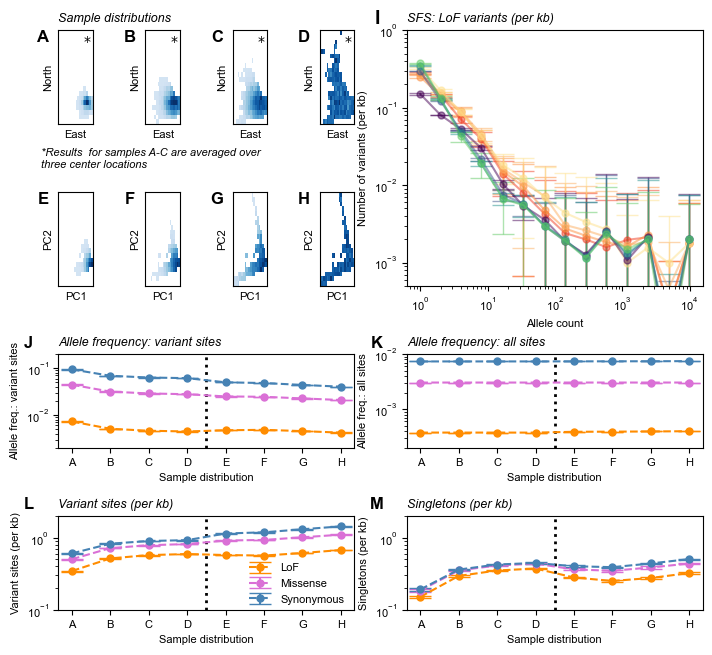

In [56]:
fig = plt.figure(figsize=(7.01, 6.42)) 
gs = gridspec.GridSpec(4, 8, figure=fig)
axes = {}

### PLOT SETUP ###
for i in range(8):
    if i<4:
        ax = fig.add_subplot(gs[0, i])  
        ax.set_xticks([])
        ax.set_yticks([])
        axes[f'square_{i + 1}'] = ax  
        ax.text(-0.45, 1, chr(65 + i), fontsize=12, weight='bold', 
                ha='center', va='top', transform=ax.transAxes)
        ax.set_xlabel('East')
        ax.set_ylabel('North')
        ax.text(0.95,0.95,r'$*$',transform = ax.transAxes,ha='right',va='top',fontsize=10)
        
    else:
        ax = fig.add_subplot(gs[1, i-4])  
        ax.set_xticks([])
        ax.set_yticks([])
        axes[f'square_{i + 1}'] = ax  
        ax.text(-0.45, 1, chr(65 + i), fontsize=12, weight='bold', 
                ha='center', va='top', transform=ax.transAxes)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
    if i==0:
        ax.set_title('Sample distributions',fontstyle='italic',loc='left')

axes['wide_panel_1'] = fig.add_subplot(gs[0:2, 4:])  # 
axes['wide_panel_1'].set_xticks([])
axes['wide_panel_1'].set_yticks([])

axes['panel2'] = fig.add_subplot(gs[2,0:4])
axes['panel3'] = fig.add_subplot(gs[2,4:])
axes['panel4'] = fig.add_subplot(gs[3,0:4])
axes['panel5'] = fig.add_subplot(gs[3,4:])
# axes['panel6'] = fig.add_subplot(gs[4, 0:4])

#### HEATMAPS ####

df = pd.read_csv('../empirical/subsampling_SIR_v20250127/metadata/metadata_cleaned_wes.csv')
## geo ##
df_geo = df[(df['birth_east_coord'].notna()) & (df['birth_UKelsewhere'] != 'Elsewhere') & (df['used_in_pca'] == 1) & (df['within_1epsilon_pca'] == True)]
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.18, 1, cmap.N)))
cmap.set_under('white')
x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x, y, bins=20)
w_list = ['50000', '100000', '150000']
centers = ['centerE16N4', 'centerE9N9', 'centerE6N4']
c = centers[0]
for j, w in enumerate(w_list):
    idlist = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_synonymous_{c}geo{w}_nSIR10000_nSIRreps10.SIRexamples', delimiter=' ', header=None)
    ids = idlist[idlist[1] == 0]
    ids.rename(columns={2: 'id'}, inplace=True)
    temp = pd.merge(df_geo, ids, on=['id'], how='inner')
    hist_temp = axes[f'square_{j+1}'].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

idlist_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_synonymous_uniformgeo_nSIR10000_nSIRreps10.SIRexamples', sep=' ', header=None)
ids_unif = idlist_unif[idlist_unif[1] == 0]
ids_unif.rename(columns={2: 'id'}, inplace=True)
temp = pd.merge(df_geo, ids_unif, on=['id'], how='inner')
hist_temp = axes['square_4'].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

## pca ##
df_pca = df[(df['used_in_pca'] == 1)]
w_list = [0.0015, 0.0025, 0.005]
centers = ['centerX19Y4', 'centerX0Y0', 'centerX12Y19'] 
c = centers[0]
x = df_pca['PC1']
y = df_pca['PC2']
counts, xedges, yedges = np.histogram2d(x, y, bins=20)

for j, w in enumerate(w_list):
    idlist = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_synonymous_{c}pca{w}_nSIR10000_nSIRreps10.SIRexamples', header=None, sep=' ')
    ids = idlist[idlist[1] == 0]
    ids.rename(columns={2: 'id'}, inplace=True)
    temp = pd.merge(df_pca, ids, on=['id'], how='inner')
    hist_temp = axes[f'square_{j+5}'].hist2d(temp['PC1'], temp['PC2'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)

idlist_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_synonymous_uniformpca_nSIR10000_nSIRreps10.SIRexamples', sep=' ', header=None)
ids_unif = idlist_unif[idlist_unif[1] == 0]
ids_unif.rename(columns={2: 'id'}, inplace=True)
temp = pd.merge(df_pca, ids_unif, on=['id'], how='inner')
hist_temp = axes['square_8'].hist2d(temp['PC1'], temp['PC2'], bins=[xedges, yedges], cmap=cmap, vmin=1e-8)


####### SFS #########

vartypes=['lof']
colors = ['#440154',  
          '#3b528b',  
          '#21918c',  
          '#5ec962',  
          '#f03b20',  
          '#fd8d3c',  
          '#fdae61',  
          '#fee08b']  
all_lof_pca = []
all_lof_geo = []
scale_factor = 3924.065 

# pca sfs
centers=['centerX19Y4']
w_list = [0.0015,0.0025,0.005]
labs_pca = ['E','F','G','H']
nbins=15
for i, vt in enumerate(vartypes):
    sfs_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']/scale_factor
    sfs_unif_std = sfs_unif_grouped['std']/scale_factor
    
    log_bins = np.logspace(np.log10(1), np.log10(sfs_unif_avg.index.max()), num=nbins)  # Start from 1 instead of 10
    log_bins = np.unique(np.round(log_bins))  # Ensure bins are unique and rounded
    
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)
    
    for j, w in enumerate(w_list):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_{center}pca{w}_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg_grouped = sfs_avg_grouped.dropna(subset=['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']/scale_factor
            sfs_std = sfs_avg_grouped['std']/scale_factor
    
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)    

        sfs_avg_final = pd.concat(all_sfs_avg, axis=1).values
        sfs_avg_forindex = pd.concat(all_sfs_avg, axis=1)
        sfs_std_final = pd.concat(all_sfs_std, axis=1).values
        sfs_forindex = sfs_avg_forindex.mean(axis=1)
        sfs_avg_binned, _ = np.histogram(sfs_forindex.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.flatten())
        std_gaussian_binned, _ = np.histogram(sfs_forindex.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.flatten())

        axes[f'wide_panel_{i+1}'].errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_pca[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=5, elinewidth=1, fmt='o', alpha=0.5, color=colors[j+4])

        panel_data = pd.DataFrame({
            'log_bins': log_bins[:-1],  
            'sfs_avg_binned': sfs_avg_binned,  
            'std_binned': std_gaussian_binned,  
            'w': w,
            'center':center
        })
        all_lof_pca.append(panel_data)
        
    axes[f'wide_panel_{i+1}'].errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_pca[3],
                marker='o', capsize=8, markersize=5, elinewidth=1, fmt='o', alpha=0.5, color=colors[7])
    panel_data = pd.DataFrame({
            'log_bins': log_bins[:-1],  
            'sfs_avg_binned': sfs_unif_binned,  
            'std_binned': std_unif_binned,  
            'w': 'uniform',
            'center':'NA',
        })
    all_lof_pca.append(panel_data)
    

## geo ##

centers = ['centerE16N4','centerE9N9','centerE6N4']
w_list = ['50000', '100000', '150000']
labs_geo = ['A','B','C','D']

for i, vt in enumerate(vartypes):
    sfs_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.daf.sfs', sep='\t')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']/scale_factor
    sfs_unif_std = sfs_unif_grouped['std']/scale_factor
    
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)


    for j, w in enumerate(w_list):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']/scale_factor
            sfs_std = sfs_avg_grouped['std']/scale_factor

            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)

        # print(all_sfs_std)
        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)
        # print(sfs_std_final)
        sfs_std_final = sfs_std_final.fillna(0)
        
        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)
    #     # print(std_gaussian_binned)
        axes[f'wide_panel_{i+1}'].errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_geo[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=5, elinewidth=1, fmt='o', alpha=0.5, color=colors[j])
        panel_data = pd.DataFrame({
            'log_bins': log_bins[:-1],  
            'sfs_avg_binned': sfs_avg_binned,  
            'std_binned': std_gaussian_binned,  
            'w': w,
            'center':center
        })
        all_lof_geo.append(panel_data)

    axes[f'wide_panel_{i+1}'].errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_geo[3],
                marker='o', capsize=8, markersize=5, elinewidth=1, fmt='o', alpha=0.5, color=colors[3])
    panel_data = pd.DataFrame({
            'log_bins': log_bins[:-1],  
            'sfs_avg_binned': sfs_unif_binned,  
            'std_binned': std_unif_binned,  
            'w': 'uniform',
            'center':'NA',
        })
    all_lof_geo.append(panel_data)

##### SUM STATS ######

vartypes = ['synonymous','missense','lof']
colors_vt = ['steelblue','orchid','darkorange']
# lt=['-','dotted','--']
labels = ['A','B','C','D','E','F','G','H']
axes['panel3'].errorbar(labels,df_freq_all_avg['Mean_LOF'],df_freq_all_avg['Std_LOF'],fmt='o',linestyle='--',color=colors_vt[2],label="LoF",capsize=8,markersize=5)
axes['panel3'].errorbar(labels,df_freq_all_avg['Mean_Missense'],df_freq_all_avg['Std_Missense'],fmt='o',linestyle='--',color=colors_vt[1],label="Missense",capsize=8,markersize=5)
axes['panel3'].errorbar(labels,df_freq_all_avg['Mean_Synonymous'],df_freq_all_avg['Std_Synonymous'],fmt='o',linestyle='--',color=colors_vt[0],label="Synonymous",capsize=8,markersize=5)
axes['panel3'].set_ylim(2e-4,1e-2)#(5e-5,5e-1)

axes['panel2'].errorbar(labels,df_freq_seg_avg['Mean_LOF'],df_freq_seg_avg['Std_LOF'],fmt='o',linestyle='--',color=colors_vt[2],label="LoF",capsize=8,markersize=5)
axes['panel2'].errorbar(labels,df_freq_seg_avg['Mean_Missense'],df_freq_seg_avg['Std_Missense'],fmt='o',linestyle='--',color=colors_vt[1],label="Missense",capsize=8,markersize=5)
axes['panel2'].errorbar(labels,df_freq_seg_avg['Mean_Synonymous'],df_freq_seg_avg['Std_Synonymous'],fmt='o',linestyle='--',color=colors_vt[0],label="Synonymous",capsize=8,markersize=5)
axes['panel2'].set_ylim(2e-3,2e-1)#(5e-5,5e-1)

axes['panel4'].errorbar(labels,mean_segsites_lof,std_segsites_lof,fmt='o',linestyle='--',color=colors_vt[2],label="LoF",capsize=8,markersize=5)
axes['panel4'].errorbar(labels,mean_segsites_missense,std_segsites_missense,fmt='o',linestyle='--',color=colors_vt[1],label="Missense",capsize=8,markersize=5)
axes['panel4'].errorbar(labels,mean_segsites_synonymous,std_segsites_synonymous,fmt='o',linestyle='--',color=colors_vt[0],label="Synonymous",capsize=8,markersize=5)
axes['panel4'].set_ylim(1e-1,2e0)


axes['panel5'].errorbar(labels,mean_singletons_lof,std_singletons_lof,fmt='o',linestyle='--',color=colors_vt[2],label="LoF",capsize=8,markersize=5)
axes['panel5'].errorbar(labels,mean_singletons_missense,std_singletons_missense,fmt='o',linestyle='--',color=colors_vt[1],label="Missense",capsize=8,markersize=5)
axes['panel5'].errorbar(labels,mean_singletons_synonymous,std_singletons_synonymous,fmt='o',linestyle='--',color=colors_vt[0],label="Synonymous",capsize=8,markersize=5)
axes['panel5'].set_ylim(1e-1,2e0)


## Other axis labels and settings ###
# handles, labels = axes['wide_panel_1'].get_legend_handles_labels()
order = [4,5,6,7,0,1,2,3]  
# axes['wide_panel_1'].legend([handles[i] for i in order], [labels[i] for i in order],loc='upper right',ncol=2,frameon=False)
axes['wide_panel_1'].set_yscale('log')
axes['wide_panel_1'].set_xscale('log')
axes['wide_panel_1'].set_title('SFS: LoF variants (per kb)',loc='left',fontstyle='italic')
axes['wide_panel_1'].set_ylabel('Number of variants (per kb)')
axes['wide_panel_1'].set_xlabel('Allele count')
axes['wide_panel_1'].set_ylim(5e-4,1e0)
      
axes['panel2'].set_yscale('log')
axes['panel3'].set_yscale('log')
axes['panel4'].set_yscale('log')
axes['panel5'].set_yscale('log')

# axes['panel2'].set_ylim(1e-1,5e0)
# axes['panel3'].set_ylim(1e-1,5e0)
# axes['panel4'].set_ylim(5e-5,5e-2)
# axes['panel5'].set_ylim(5e-5,5e-2)

axes['panel4'].set_ylabel('Variant sites (per kb)')
axes['panel5'].set_ylabel('Singletons (per kb)')
axes['panel2'].set_ylabel('Allele freq.: variant sites')
axes['panel3'].set_ylabel('Allele freq.: all sites')

axes['panel4'].set_title('Variant sites (per kb)',loc='left',fontstyle='italic')
axes['panel5'].set_title('Singletons (per kb)',loc='left',fontstyle='italic')
axes['panel2'].set_title('Allele frequency: variant sites',loc='left',fontstyle='italic')
axes['panel3'].set_title('Allele frequency: all sites',loc='left',fontstyle='italic')


axes['panel4'].axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)
axes['panel5'].axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)
axes['panel2'].axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)
axes['panel3'].axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)

axes['panel4'].legend(loc='lower right',frameon=False, bbox_to_anchor=(1, -0.05))

axes['panel4'].set_xlabel('Sample distribution')
axes['panel5'].set_xlabel('Sample distribution')
axes['panel2'].set_xlabel('Sample distribution')
axes['panel3'].set_xlabel('Sample distribution')

axes['wide_panel_1'].text(-0.1, 1.08, 'I', fontsize=14, weight='bold', 
                          ha='center', va='top', transform=axes['wide_panel_1'].transAxes)
axes['panel2'].text(-0.1, 1.2, 'J', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel2'].transAxes)
axes['panel3'].text(-0.1, 1.2, 'K', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel3'].transAxes)
axes['panel4'].text(-0.1, 1.2, 'L', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel4'].transAxes)
axes['panel5'].text(-0.1, 1.2, 'M', fontsize=12, weight='bold', 
                          ha='center', va='top', transform=axes['panel5'].transAxes)

fig.text(0.05,0.75,'*Results  for samples A-C are averaged over\nthree center locations',ha='left',fontsize=8,fontstyle='italic')

plt.tight_layout(pad=0.3)
plt.savefig('ukb_maintextfig_PNASformat_v2.pdf')
plt.show()


### Fig S12

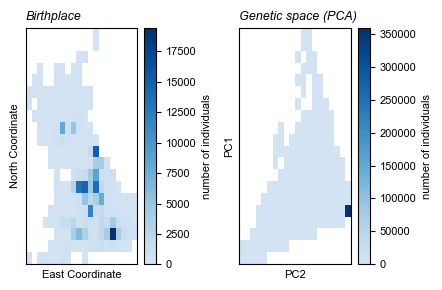

In [59]:
# function to map to bin
def map_to_bin(x,y,xedges,yedges):
    return [np.digitize(x,xedges)-1,np.digitize(y,yedges)-1]

# function to get bin center
def get_bin_center(bin_idx,xedges,yedges):
    x_idx, y_idx = bin_idx
    center_x = (xedges[x_idx] + xedges[x_idx + 1]) / 2
    center_y = (yedges[y_idx] + yedges[y_idx + 1]) / 2
    return [center_x, center_y]

df = pd.read_csv('../empirical/subsampling_SIR_v20250127/metadata/metadata_cleaned_wes.csv')
df_geo = df[(df['birth_east_coord'].notna()) & (df['birth_UKelsewhere']!='Elsewhere') & (df['used_in_pca']==1) & (df['within_1epsilon_pca']==True)]
df_pca = df[(df['used_in_pca']==1)]

fig,ax = plt.subplots(1,2,figsize=(4.49,3))


x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.18, 1, cmap.N)))
cmap.set_under('white')

im = ax[0].imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.colorbar(im,label='number of individuals',ax=ax[0])
ax[0].set_title('Birthplace',fontstyle='italic',loc='left')
ax[0].set_ylabel('North Coordinate')
ax[0].set_xlabel('East Coordinate')


x = df_pca['PC1']
y = df_pca['PC2']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
# cmap = plt.get_cmap('Blues')
# cmap.set_under('white')
im = ax[1].imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.colorbar(im,label='number of individuals',ax=ax[1])
ax[1].set_title('Genetic space (PCA)',fontstyle='italic',loc='left')
ax[1].set_ylabel('PC1')
ax[1].set_xlabel('PC2')

for a in ax.flatten():
    a.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)

plt.tight_layout()
# plt.show()
plt.savefig('density_plots.pdf', dpi=1200, bbox_inches='tight')

### Fig S13

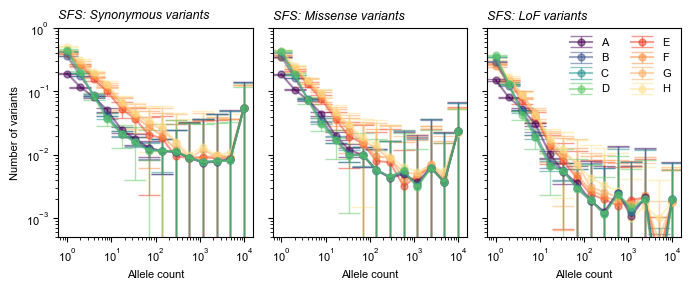

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(7.01, 3), sharex=True, sharey=True)
vartypes=['synonymous','missense','lof']
centers=['centerX19Y4']
w_list = [0.0015,0.0025,0.005]
labs_pca = ['E','F','G','H']
nbins=15
for i, vt in enumerate(vartypes):
    sfs_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']/scale_factor
    sfs_unif_std = sfs_unif_grouped['std']/scale_factor
    
    log_bins = np.logspace(np.log10(1), np.log10(sfs_unif_avg.index.max()), num=nbins)  # Start from 1 instead of 10
    log_bins = np.unique(np.round(log_bins))  # Ensure bins are unique and rounded
    
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)
    
    for j, w in enumerate(w_list):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_{center}pca{w}_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg_grouped = sfs_avg_grouped.dropna(subset=['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']/scale_factor
            sfs_std = sfs_avg_grouped['std']/scale_factor
    
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)    

        sfs_avg_final = pd.concat(all_sfs_avg, axis=1).values
        sfs_avg_forindex = pd.concat(all_sfs_avg, axis=1)
        sfs_std_final = pd.concat(all_sfs_std, axis=1).values
        sfs_forindex = sfs_avg_forindex.mean(axis=1)
        sfs_avg_binned, _ = np.histogram(sfs_forindex.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.flatten())
        std_gaussian_binned, _ = np.histogram(sfs_forindex.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.flatten())
        
        axes[i].errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_pca[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=5, elinewidth=1, fmt='o', alpha=0.5, color=colors[j+4])

        
    axes[i].errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_pca[3],
                marker='o', capsize=8, markersize=5, elinewidth=1, fmt='o', alpha=0.5, color=colors[7])

centers = ['centerE16N4','centerE9N9','centerE6N4']
w_list = ['50000', '100000', '150000']
labs_geo = ['A','B','C','D']

for i, vt in enumerate(vartypes):
    sfs_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.daf.sfs', sep='\t')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']/scale_factor
    sfs_unif_std = sfs_unif_grouped['std']/scale_factor
    
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)


    for j, w in enumerate(w_list):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']/scale_factor
            sfs_std = sfs_avg_grouped['std']/scale_factor

            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)

        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)
        sfs_std_final = sfs_std_final.fillna(0)
        
        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)
        axes[i].errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=labs_geo[j],
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=5, elinewidth=1, fmt='o', alpha=0.5, color=colors[j])

    axes[i].errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='-', label=labs_geo[3],
                marker='o', capsize=8, markersize=5, elinewidth=1, fmt='o', alpha=0.5, color=colors[3])

vartypes=['Synonymous','Missense','LoF']
for i in [0,1,2]:
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')
    axes[i].set_ylim(5e-4,1e0)
    axes[i].set_title(f'SFS: {vartypes[i]} variants', loc='left', fontstyle='italic')
    axes[i].set_xlabel("Allele count")
    if i == 0:
        axes[i].set_ylabel("Number of variants")
    handles, labels = axes[i].get_legend_handles_labels()
    order = [4,5,6,7,0,1,2,3]  # Define the desired order (e.g., reorder to ['Bird', 'Dog', 'Cat'])
    if i == 2:
        axes[i].legend([handles[i] for i in order], [labels[i] for i in order],loc='upper right',ncol=2,frameon=False)
    
plt.tight_layout()
plt.savefig(f'sfs_syn_miss_lof.pdf')


### Fig S14

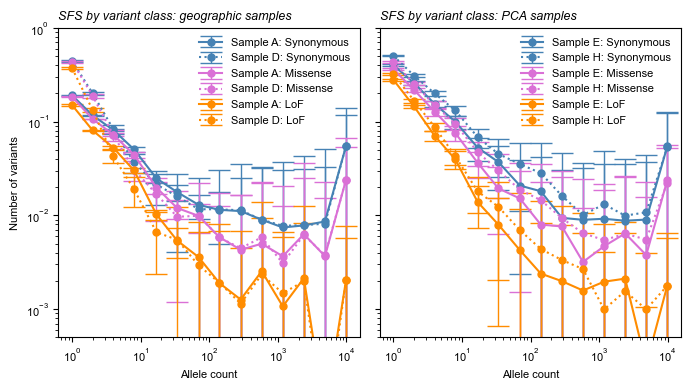

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(7.01, 4), sharex=True, sharey=True)
vartypes=['synonymous','missense','lof']
centers=['centerX19Y4']
w_list = [0.0015]
labs_pca = ['E','H']
nbins=15
colors_vt = ['steelblue','orchid','darkorange']
for i, vt in enumerate(vartypes):
    if vt=='synonymous':
        vt_cap='Synonymous'
    elif vt=='missense':
        vt_cap='Missense'
    elif vt=='lof':
        vt_cap='LoF'
    sfs_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_uniformpca_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']/scale_factor
    sfs_unif_std = sfs_unif_grouped['std']/scale_factor
    
    log_bins = np.logspace(np.log10(1), np.log10(sfs_unif_avg.index.max()), num=nbins)  # Start from 1 instead of 10
    log_bins = np.unique(np.round(log_bins))  # Ensure bins are unique and rounded
    
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)

    for j, w in enumerate(w_list):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_{center}pca{w}_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg_grouped = sfs_avg_grouped.dropna(subset=['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']/scale_factor
            sfs_std = sfs_avg_grouped['std']/scale_factor
    
            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)    

        sfs_avg_final = pd.concat(all_sfs_avg, axis=1).values
        sfs_avg_forindex = pd.concat(all_sfs_avg, axis=1)
        sfs_std_final = pd.concat(all_sfs_std, axis=1).values
        sfs_forindex = sfs_avg_forindex.mean(axis=1)
        sfs_avg_binned, _ = np.histogram(sfs_forindex.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.flatten())
        std_gaussian_binned, _ = np.histogram(sfs_forindex.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.flatten())
        
        axes[1].errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=f'Sample E: {vt_cap}',
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=5, elinewidth=1, fmt='o', alpha=1, color=colors_vt[i])

        
    axes[1].errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='dotted', label=f'Sample H: {vt_cap}',
                marker='o', capsize=8, markersize=5, elinewidth=1, fmt='o', alpha=1, color=colors_vt[i])
centers = ['centerE16N4','centerE9N9','centerE6N4']
w_list = ['50000']
labs_geo = ['A','D']

for i, vt in enumerate(vartypes):
    if vt=='synonymous':
        vt_cap='Synonymous'
    elif vt=='missense':
        vt_cap='Missense'
    elif vt=='lof':
        vt_cap='LoF'
    sfs_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.daf.sfs', sep='\t')
    sfs_unif_grouped = sfs_unif.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
    sfs_unif_avg = sfs_unif_grouped['mean']/scale_factor
    sfs_unif_std = sfs_unif_grouped['std']/scale_factor
    
    sfs_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_avg.values)
    std_unif_binned, _ = np.histogram(sfs_unif_avg.index, 
                                       bins=log_bins, 
                                       weights=sfs_unif_std.values)


    for j, w in enumerate(w_list):
        all_sfs_avg = []
        all_sfs_std = []

        for center in centers:
            sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_daf/chr1_{vt}_{center}geo{w}_nSIR10000_nSIRreps10.daf.sfs', delimiter='\t')
            sfs_avg_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std'])
            sfs_avg = sfs_avg_grouped['mean']/scale_factor
            sfs_std = sfs_avg_grouped['std']/scale_factor

            all_sfs_avg.append(sfs_avg)
            all_sfs_std.append(sfs_std)

        combined_sfs_avg = pd.concat(all_sfs_avg, axis=1)
        combined_sfs_std = pd.concat(all_sfs_std, axis=1)
        sfs_avg_final = combined_sfs_avg.mean(axis=1)
        sfs_std_final = combined_sfs_std.std(axis=1)
        sfs_std_final = sfs_std_final.fillna(0)
        
        sfs_avg_binned, _ = np.histogram(sfs_avg_final.index, 
                                          bins=log_bins,
                                          weights=sfs_avg_final.values)
        std_gaussian_binned, _ = np.histogram(sfs_avg_final.index,
                                               bins=log_bins,
                                               weights=sfs_std_final.values)
        axes[0].errorbar(log_bins[:-1], sfs_avg_binned,
                                             yerr=std_gaussian_binned, label=f'Sample A: {vt_cap}',
                                             linestyle='-', marker='o', capsize=8,
                                             markersize=5, elinewidth=1, fmt='o', alpha=1, color=colors_vt[i])

    axes[0].errorbar(log_bins[:-1], sfs_unif_binned, 
                yerr=std_unif_binned, linestyle='dotted', label=f'Sample D: {vt_cap}',
                marker='o', capsize=8, markersize=5, elinewidth=1, fmt='o', alpha=1, color=colors_vt[i])

# vartypes=['Synonymous','Missense','LoF']
title = ['geographic','PCA']
for i in [0,1]:
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')
    axes[i].set_ylim(5e-4,1e0)
    axes[i].set_title(f'SFS by variant class: {title[i]} samples', loc='left', fontstyle='italic')
    axes[i].set_xlabel("Allele count")
    if i == 0:
        axes[i].set_ylabel("Number of variants")
    handles, labels = axes[i].get_legend_handles_labels()
    order = [0,1,2,3,4,5]
    axes[i].legend([handles[i] for i in order], [labels[i] for i in order],loc='upper right',ncol=1,frameon=False)
    
plt.tight_layout()
plt.savefig(f'sfs_varclass_twopanel.pdf')


### Fig S15

In [305]:
# df_het_avg

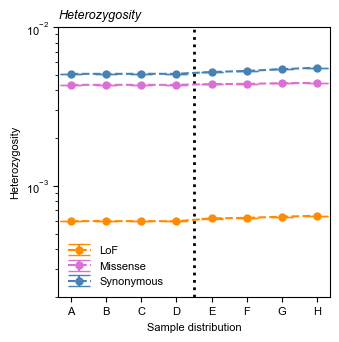

In [301]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

vartypes = ['synonymous','missense','lof']
colors_vt = ['steelblue','orchid','darkorange']
# lt=['-','dotted','--']
labels = ['A','B','C','D','E','F','G','H']
ax.errorbar(labels,df_het_avg['Mean_LOF'],df_het_avg['Std_LOF'],fmt='o',linestyle='--',color=colors_vt[2],label="LoF",capsize=8,markersize=5)
ax.errorbar(labels,df_het_avg['Mean_Missense'],df_het_avg['Std_Missense'],fmt='o',linestyle='--',color=colors_vt[1],label="Missense",capsize=8,markersize=5)
ax.errorbar(labels,df_het_avg['Mean_Synonymous'],df_het_avg['Std_Synonymous'],fmt='o',linestyle='--',color=colors_vt[0],label="Synonymous",capsize=8,markersize=5)
ax.set_yscale('log')
ax.set_ylim(2e-4,1e-2)#(5e-5,5e-1)
ax.set_title(f'Heterozygosity', loc='left', fontstyle='italic')
ax.legend(frameon=False)
ax.set_xlabel('Sample distribution')
ax.set_ylabel('Heterozygosity')
ax.axvline(x=3.5, color='black', linestyle='dotted', linewidth=2)
plt.savefig('het_ukb.pdf')

### Fig S16

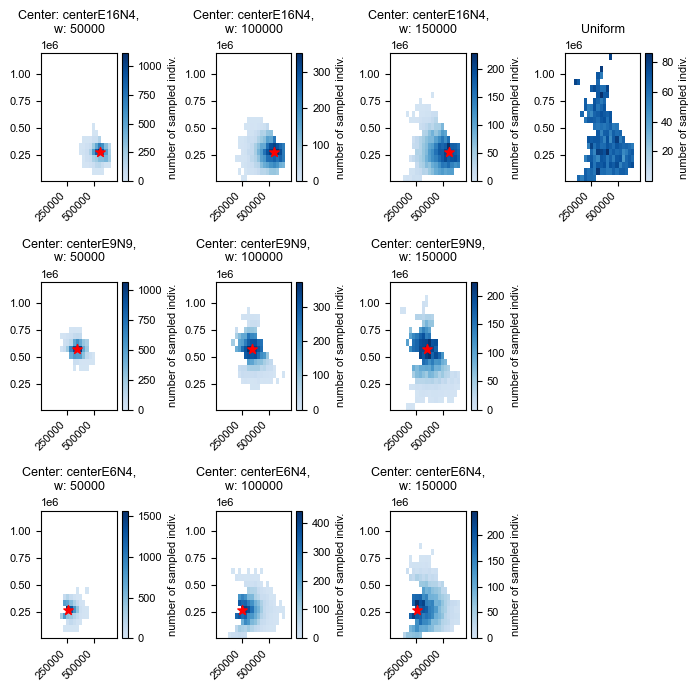

In [304]:
# cmap = plt.get_cmap('Blues')
# cmap.set_under('white')
x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
reps = [0]#np.arange(10)

center_bin_1 = [16,4]
center_bin_2 = [9,9]
center_bin_3 = [6,4]
center_coord_1 = get_bin_center(center_bin_1,xedges,yedges)
center_coord_2 = get_bin_center(center_bin_2,xedges,yedges)
center_coord_3 = get_bin_center(center_bin_3,xedges,yedges)

w_list = ['50000','100000','150000']
centers = ['centerE16N4','centerE9N9','centerE6N4']
vartypes = ['lof']

for vt in vartypes:
    for rep in reps:
        fig,ax=plt.subplots(3,4,figsize=(7.01,7.01))
        for a in ax.flat:
            plt.setp(a.get_xticklabels(), rotation=45, ha="right")
        idlist_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.SIRexamples',sep = ' ', header=None)
        ids_unif = idlist_unif[idlist_unif[1]==rep]
        ids_unif.rename(columns={2: 'id'}, inplace=True)
        temp = pd.merge(df_geo, ids_unif, on=['id'], how='inner')
        # temp = temp.drop_duplicates()
        hist_temp = ax[0,3].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap,vmin=1e-8)
        ax[0,3].axis('equal')
        ax[0,3].set_title('Uniform')
        cbar = fig.colorbar(hist_temp[3], ax=ax[0,3], orientation='vertical',label='number of sampled indiv.')
    
        for i,c in enumerate(centers):
            for j,w in enumerate(w_list):
                idlist = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_{vt}_{c}geo{w}_nSIR10000_nSIRreps10.SIRexamples',delimiter=' ',header=None)
                ## subset by rep ## 
                ids = idlist[idlist[1]==rep]
                ids.rename(columns={2: 'id'}, inplace=True)
                temp = pd.merge(df_geo, ids, on=['id'], how='inner')
                
                hist_temp = ax[i,j].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap,vmin=1e-8)
                ax[i,j].axis('equal')
                ax[i,j].set_title(f'Center: {c},\nw: {w}')
                cbar = fig.colorbar(hist_temp[3], ax=ax[i,j], orientation='vertical',label='number of sampled indiv.')
                if c=='centerE16N4':
                    ax[i,j].scatter(center_coord_1[0],center_coord_1[1],s=50,marker="*",c='r')#,label='center bin 1')
                if c=='centerE9N9':
                    ax[i,j].scatter(center_coord_2[0],center_coord_2[1],s=50,marker="*",c='r')#,label='center bin 2')
                if c=='centerE6N4':
                    ax[i,j].scatter(center_coord_3[0],center_coord_3[1],s=50,marker="*",c='r')#,label='center bin 3')
    
        ax[1,3].axis('off')
        ax[2,3].axis('off')
        plt.tight_layout()
        # plt.show()
        plt.savefig('geo_locations.pdf')
        # plt.savefig(f'../plots_20241028/loc_dist/loc_dist_geo_chr1_{vt}_rep{rep}.png')
